In [2]:
%pylab inline
import gc
import galsim
import numpy as np
import fpfsBase
import astropy.io.fits as pyfits

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


In [67]:
ngrid       =   64
nx          =   100
ny          =   100
ndata       =   nx*ny
scale       =   0.168
gal_image=galsim.fits.read('sim20210301/galaxy_basic_psf60/image-0-g1-0000.fits')

In [81]:
psfFWHM =   0.6
psfInt  =   galsim.Moffat(beta=3.5,fwhm=psfFWHM,trunc=psfFWHM*4.)
psfInt  =   psfInt.shear(e1=0.02,e2=-0.02)
psfImg  =   psfInt.drawImage(nx=45,ny=45,scale=scale)
print('PSF FWHM: %.3f arcsec' % (psfImg.FindAdaptiveMom().moments_sigma*scale*2.355))

PSF FWHM: 0.678 arcsec


galaxy radius: 1.92
galaxy radius: 1.88
galaxy radius: 2.01
galaxy radius: 1.96
galaxy radius: 2.79
galaxy radius: 2.67
galaxy radius: 2.68
galaxy radius: 2.58
galaxy radius: 1.92
galaxy radius: 1.88
galaxy radius: 2.10
galaxy radius: 2.04
galaxy radius: 1.97
galaxy radius: 1.92
galaxy radius: 3.25
galaxy radius: 3.15
galaxy radius: 1.96
galaxy radius: 1.92
galaxy radius: 2.88
galaxy radius: 2.75
galaxy radius: 3.23
galaxy radius: 3.10
galaxy radius: 1.93
galaxy radius: 1.90
galaxy radius: 2.20
galaxy radius: 2.12
galaxy radius: 2.91
galaxy radius: 2.79
galaxy radius: 3.45
galaxy radius: 3.29
galaxy radius: 1.90
galaxy radius: 1.86
galaxy radius: 2.40
galaxy radius: 2.32
galaxy radius: 2.68
galaxy radius: 2.59
galaxy radius: 1.96
galaxy radius: 1.92
galaxy radius: 2.30
galaxy radius: 2.21


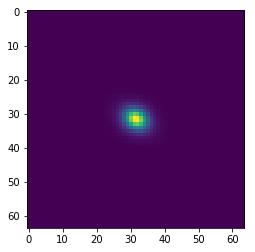

In [101]:
for i in range(20):
    ix      =   i%nx
    iy      =   i//nx
    b       =   galsim.BoundsI(ix*ngrid,(ix+1)*ngrid-1,iy*ngrid,(iy+1)*ngrid-1)
    sub_img =   gal_image[b]
    plt.imshow(sub_img.array)
    print('galaxy radius: %.2f' %sub_img.FindAdaptiveMom().moments_sigma)
    print('galaxy radius: %.2f' %galsim.hsm.EstimateShear(sub_img,psfImg).moments_sigma)

In [104]:
a=sub_img.FindAdaptiveMom()

In [106]:
b=galsim.hsm.EstimateShear(sub_img,psfImg)

In [107]:
a.moments_sigma

2.2955451011657715

In [108]:
b.moments_sigma

2.212294101715088

In [120]:
galaxy = galsim.Gaussian(flux=1.0, sigma=1.0)
psf = galsim.Gaussian(flux=1.0, sigma=0.4)
final = galsim.Convolve(galaxy, psf)

In [130]:
final_image = final.drawImage(scale=0.1,method='no_pixel')
final_epsf_image = psf.drawImage(scale=0.1,method='no_pixel')
result = galsim.hsm.EstimateShear(final_image, final_epsf_image)
result2= galsim.hsm.FindAdaptiveMom(final_image)

In [129]:
result.moments_sigma

10.770329475402832

In [131]:
result2.moments_sigma

10.770329475402832

In [ ]:
result2.resolution_factor

In [133]:
final_image.scale

0.1

In [135]:
result = galsim.hsm.EstimateShear(final_epsf_image, final_epsf_image,strict=False)